In [309]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


# **Data Reading**

In [310]:
# Specify the file path
sms_dataset_path = "/kaggle/input/sms-spam-collection-dataset/spam.csv"

# Read the CSV file into a pandas DataFrame
sms_dataset = pd.read_csv(sms_dataset_path, encoding='latin-1')

In [311]:
sms_dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [312]:
sms_dataset=sms_dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [313]:
sms_dataset.columns = ['TypeOfSMS','Text']

In [314]:
sms_dataset.head()

,TypeOfSMS,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [315]:
sms_dataset.shape

(5572, 2)

In [316]:
sms_dataset.isnull().sum()

TypeOfSMS    0
Text         0
dtype: int64

In [317]:
sms_dataset['TypeOfSMS']=sms_dataset['TypeOfSMS'].replace('ham',0)

In [318]:
sms_dataset['TypeOfSMS']=sms_dataset['TypeOfSMS'].replace('spam',1)

In [319]:
sms_dataset

,TypeOfSMS,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# **Data Visualization**

Text(0, 0.5, 'Count')

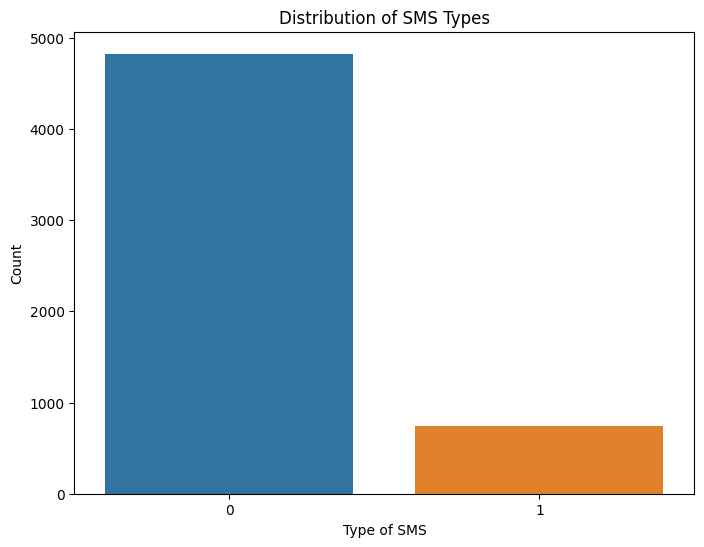

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a countplot and customize its appearance
sns.countplot(data=sms_dataset, x='TypeOfSMS')
plt.title('Distribution of SMS Types')
plt.xlabel('Type of SMS')
plt.ylabel('Count')

# **Data Cleaning**

**Removing Stopwords**

In [321]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizers=ToktokTokenizer() #for tokenization of data

In [322]:
stopwords=nltk.corpus.stopwords.words("english") #for storing stopwords(english) in variable "stopwords"

In [323]:
def remove_stopwords(text):
  tokens=tokenizers.tokenize(text)
  tokens=[i.strip() for i in tokens] #strip is used to remove leading and trailing whitespaces or special characters in strings like ***Hello, Worls***
  filtoken=[i for i in tokens if i.lower() not in stopwords]
  return ' '.join(filtoken)

In [324]:
sms_dataset['Text']=sms_dataset['Text'].apply(remove_stopwords)

In [325]:
sms_dataset

,TypeOfSMS,Text
0,0,"Go jurong point , crazy .. Available bugis n g..."
1,0,Ok lar ... Joking wif u oni ...
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say early hor ... U c already say ...
4,0,"Nah ' think goes usf , lives around though"
...,...,...
5567,1,2nd time tried 2 contact u. U å£ 750 Pound pri...
5568,0,Ì_ b going esplanade fr home ?
5569,0,"Pity , * mood that. ... suggestions ?"
5570,0,guy bitching acted like ' interested buying so...


**Stemming**

In [326]:
from nltk.stem.porter import PorterStemmer

In [327]:
def stemmer(text):
  ps=nltk.porter.PorterStemmer()
  text=' '.join([ps.stem(word) for word in text.split()])
  return text

In [328]:
sms_dataset['Text']=sms_dataset['Text'].apply(stemmer)

In [329]:
sms_dataset

,TypeOfSMS,Text
0,0,"Go jurong point , crazi .. avail bugi n great ..."
1,0,Ok lar ... joke wif u oni ...
2,1,free entri 2 wkli comp win FA cup final tkt 21...
3,0,U dun say earli hor ... U c alreadi say ...
4,0,"nah ' think goe usf , live around though"
...,...,...
5567,1,2nd time tri 2 contact u. U å£ 750 pound prize...
5568,0,Ì_ b go esplanad fr home ?
5569,0,"piti , * mood that. ... suggest ?"
5570,0,guy bitch act like ' interest buy someth els n...


# **Train Test Split**

In [330]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(sms_dataset['Text'],sms_dataset['TypeOfSMS'],test_size=0.3,random_state=7) #This sets the random seed for reproducibility,
#ensuring that the same split is obtained each time the code is executed.
print("Length of train_data",len(X_train))
print("Length of test_data",len(X_test))

Length of train_data 3900
Length of test_data 1672


# **Vectorization**

In [331]:
from sklearn.feature_extraction.text import TfidfVectorizer
td=TfidfVectorizer()
X_train = td.fit_transform(X_train)
X_test = td.transform(X_test)

# **Building a model**

In [332]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000000)
model=model.fit(X_train,Y_train)

In [333]:
predict = model.predict(X_test)

# **Accuracy**

In [334]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,predict)
print(accuracy)

0.9551435406698564


# **Loss**

In [335]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,predict)

0.04485645933014354

# **Confusion Matix**

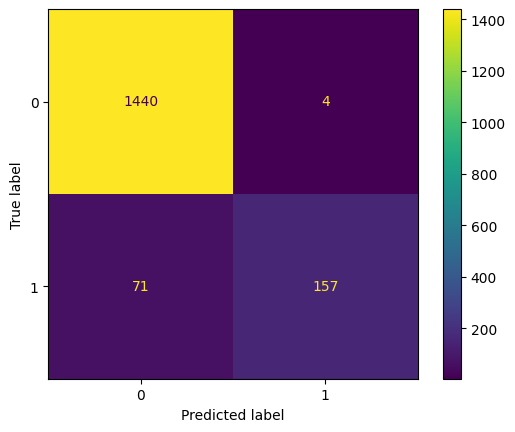

In [336]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

plt.show()